### Creating Model to classification spiral data set

In [339]:
import matplotlib.pyplot as plt
import numpy as np


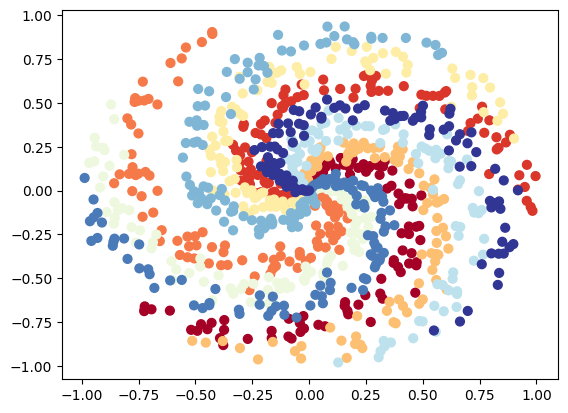

In [340]:
# Creating data using numpy library
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 10 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [341]:
# Narray -> torch.Tensor
import torch

if isinstance(X, np.ndarray):
  X = torch.from_numpy(X)
  y = torch.from_numpy(y)
else:
  pass

X = X.type(torch.float32)
y = y.type(torch.LongTensor)

X.dtype, y.dtype

(torch.float32, torch.int64)

In [342]:
# Split data to traning and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2)

In [343]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [344]:
# preper device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [345]:
# mova data to agnostick device
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

X_train.device, X_test.device, y_train.device, y_test.device

(device(type='cpu'),
 device(type='cpu'),
 device(type='cpu'),
 device(type='cpu'))

In [346]:
# accuracy function
from torchmetrics import Accuracy

acc_fn = Accuracy(task="multiclass",
                  num_classes=K)

In [347]:
# Creating model class
from torch import nn

class SpiralModel_nonLinear(nn.Module):
  def __init__(self, input_layer, output_layer, hidden_layer):
    super().__init__()
    self.layer_stac = nn.Sequential(
        nn.Linear(in_features=input_layer, out_features=hidden_layer),
        nn.ReLU(),
        nn.Linear(in_features=hidden_layer, out_features=hidden_layer),
        nn.ReLU(),
        nn.Linear(in_features=hidden_layer, out_features=hidden_layer),
        nn.ReLU(),
        nn.Linear(in_features=hidden_layer, out_features=output_layer)
    )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_stac(x)

# Creating instance of non linear model
non_linear_spiral_model_0 = SpiralModel_nonLinear(input_layer=D,
                                                 output_layer=K,
                                                 hidden_layer=10).to(device)

non_linear_spiral_model_0

SpiralModel_nonLinear(
  (layer_stac): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=10, bias=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [348]:
# Creating linear model
from torch import nn

class SpiralModel_Linear(nn.Module):
  def __init__(self, input_layer, output_layer, hidden_layer):
    super().__init__()
    self.layer_stac = nn.Sequential(
        nn.Linear(in_features=input_layer, out_features=hidden_layer),
        nn.ReLU(),
        nn.Linear(in_features=hidden_layer, out_features=hidden_layer),
        nn.ReLU(),
        nn.Linear(in_features=hidden_layer, out_features=hidden_layer),
        nn.ReLU(),
        nn.Linear(in_features=hidden_layer, out_features=output_layer)
    )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_stac(x)

# Creating instance of non linear model
linear_spiral_model_0 = SpiralModel_Linear(input_layer=D,
                                            output_layer=K,
                                            hidden_layer=10).to(device)


In [349]:
# Cheak datatype
print(X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype)


# Print out untrained model output
print("logits:")
print(non_linear_spiral_model_0(X_test[:5]))

print("prediction:")
print(torch.softmax(non_linear_spiral_model_0(X_test)[:5], dim=1))

print("pred lables:")
print(torch.softmax(non_linear_spiral_model_0(X_test)[:5], dim=1).argmax(dim=1))

torch.float32 torch.float32 torch.int64 torch.int64
logits:
tensor([[-0.0609, -0.2427, -0.0746,  0.2029,  0.0238, -0.0342,  0.1913,  0.2987,
          0.3313, -0.1817],
        [-0.0393, -0.2268, -0.1025,  0.2076,  0.0454, -0.0392,  0.1823,  0.3100,
          0.3349, -0.1885],
        [-0.0260, -0.2238, -0.1161,  0.2116,  0.0513, -0.0359,  0.1783,  0.3166,
          0.3463, -0.1963],
        [-0.0475, -0.2314, -0.0936,  0.2059,  0.0388, -0.0368,  0.1865,  0.3069,
          0.3358, -0.1843],
        [-0.0514, -0.2342, -0.0901,  0.2061,  0.0399, -0.0364,  0.1898,  0.3076,
          0.3356, -0.1823]], grad_fn=<AddmmBackward0>)
prediction:
tensor([[0.0883, 0.0736, 0.0871, 0.1150, 0.0961, 0.0907, 0.1136, 0.1265, 0.1307,
         0.0783],
        [0.0899, 0.0746, 0.0844, 0.1151, 0.0979, 0.0900, 0.1123, 0.1276, 0.1308,
         0.0775],
        [0.0909, 0.0746, 0.0831, 0.1153, 0.0982, 0.0900, 0.1115, 0.1280, 0.1319,
         0.0767],
        [0.0893, 0.0743, 0.0852, 0.1150, 0.0973, 0.0902, 0.

In [350]:
# set up loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=non_linear_spiral_model_0.parameters(),
                             lr=0.01)

In [351]:
# Creating traning loop
models = [linear_spiral_model_0, non_linear_spiral_model_0]

epochs = 1000

for model in models:
  print(model)
  for epoch in range(epochs):
    ### Traning
    model.train()

    # forward pass
    y_logit = model(X_train)
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)

    # Calcualte a loss
    loss = loss_fn(y_logit, y_train)
    acc = acc_fn(y_pred, y_train)

    # zero grad
    optimizer.zero_grad()

    # backpropagation
    loss.backward()

    # optimzer step
    optimizer.step()

    ### Test
    model.eval()
    with torch.inference_mode():
      # forward pass for test
      test_logits = model(X_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

      # calualte a loss for test
      test_loss = loss_fn(test_logits, y_test)
      test_acc = acc_fn(test_pred, y_test)

      # print result
      if (epoch) % (epochs/10) == 0:
        print(f"epoch: {epoch:.2f} | loss: {loss:.2f} | acc: {acc*100:.2f}% | loss_test: {test_loss:.2f} | acc_test: {test_acc*100:.2f}%")



SpiralModel_Linear(
  (layer_stac): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=10, bias=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=10, bias=True)
  )
)
epoch: 0.00 | loss: 2.32 | acc: 7.88% | loss_test: 2.32 | acc_test: 8.50%
epoch: 100.00 | loss: 2.32 | acc: 7.88% | loss_test: 2.32 | acc_test: 8.50%
epoch: 200.00 | loss: 2.32 | acc: 7.88% | loss_test: 2.32 | acc_test: 8.50%
epoch: 300.00 | loss: 2.32 | acc: 7.88% | loss_test: 2.32 | acc_test: 8.50%
epoch: 400.00 | loss: 2.32 | acc: 7.88% | loss_test: 2.32 | acc_test: 8.50%
epoch: 500.00 | loss: 2.32 | acc: 7.88% | loss_test: 2.32 | acc_test: 8.50%
epoch: 600.00 | loss: 2.32 | acc: 7.88% | loss_test: 2.32 | acc_test: 8.50%
epoch: 700.00 | loss: 2.32 | acc: 7.88% | loss_test: 2.32 | acc_test: 8.50%
epoch: 800.00 | loss: 2.32 | acc: 7.88% | loss_test: 

In [352]:
import requests
from pathlib import Path

# Download helper fun from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_function allredy exist and skip download")
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_function allredy exist and skip download


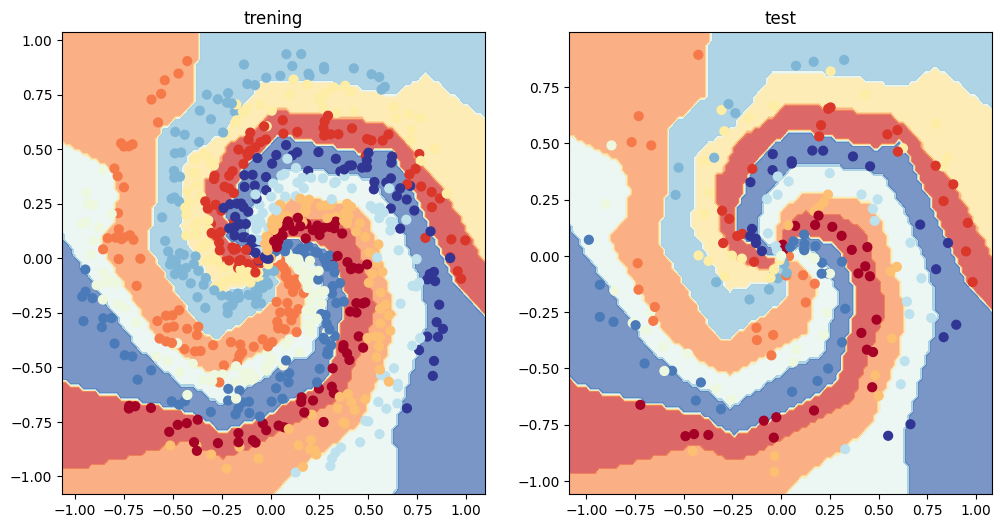

In [353]:
plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
plt.title("trening")
plot_decision_boundary(non_linear_spiral_model_0, X=X_train, y=y_train)

plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(non_linear_spiral_model_0, X=X_test, y=y_test)
